**Supervised, unsupervised, metrics, visualization:**

Find it on GitHub: https://github.com/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session3.ipynb

In this session supervised and unsupervised models will be created and their prediction performance on a test set will be evaluated. We will also create some visualizations using the datasets. You can find the datasets here: [nasa.csv ](https://drive.google.com/file/d/1JPUOwwIuFbyIWPNyMCWj78S-CIuqb75d/view?usp=sharing) , [daily demand order](https://docs.google.com/spreadsheets/d/1dTLJDzJu_pG_IEStgT5RRI1VSeGgjEKH/edit?usp=sharing&ouid=117858513827551292983&rtpof=true&sd=true), and [mall customers.csv](https://drive.google.com/file/d/1bffMMtakhbnZb4QRMCv_3Od7_kIX1Ajd/view?usp=drive_link).

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics

# Supervised: Multiple Linear Regression

## Regression model

Read the Timeseries Data:

In [ ]:
Forecasting_data = pd.read_excel("/content/Daily Demand Order (Forecasting) dated.xlsx", sheet_name=0)
print(Forecasting_data.columns)
Forecasting_data.head(3)

In [ ]:
# Check for any missing values
Forecasting_data.isna().sum()

Date                                                                  0
Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                           

Timeseries Visualization:

[matplotlib.pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

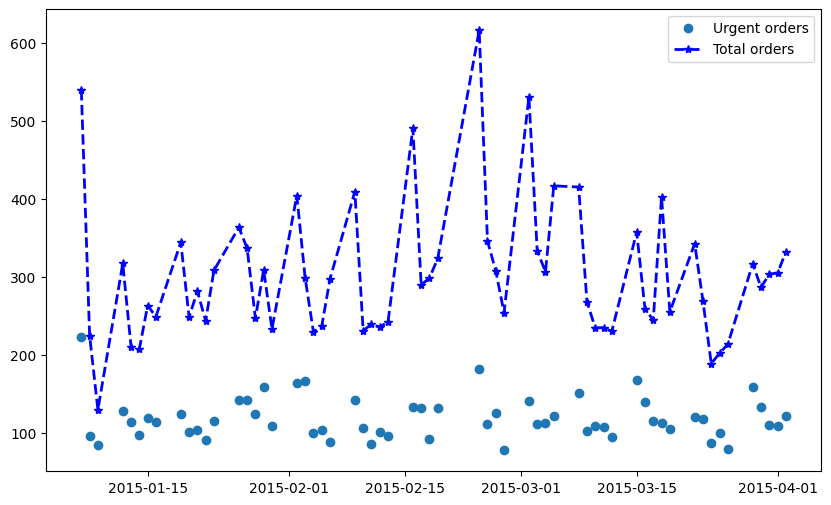

In [ ]:
plt.figure(figsize=(10,6))
x = Forecasting_data["Date"]
y1 = Forecasting_data["Urgent order"]
y2 = Forecasting_data["Target (Total orders)"]

# scatterplot & Lineplot
plt.plot(x, y1, "o", label='Urgent orders')
plt.plot(x, y2, label='Total orders', color='blue', marker='*', linestyle='--', linewidth=2, markersize=6)
plt.legend()

(array([[1., 2., 3., 1., 0., 0., 0., 0., 0., 0.],
        [0., 3., 9., 2., 0., 0., 0., 0., 0., 0.],
        [0., 1., 7., 4., 4., 1., 0., 0., 0., 0.],
        [0., 0., 1., 5., 1., 1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 2., 1., 0., 0., 1., 0.],
        [0., 0., 0., 2., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 array([ 77.371 ,  91.9609, 106.5508, 121.1407, 135.7306, 150.3205,
        164.9104, 179.5003, 194.0902, 208.6801, 223.27  ]),
 array([129.412 , 178.1161, 226.8202, 275.5243, 324.2284, 372.9325,
        421.6366, 470.3407, 519.0448, 567.7489, 616.453 ]),
 <matplotlib.collections.QuadMesh at 0x7a2c9e35f370>)

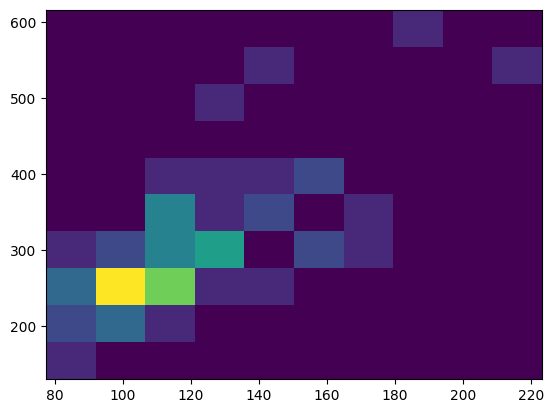

In [ ]:
plt.hist2d(y1, y2, bins = (10,10))

Data Partitioning:

Split the data into train and test subsets (Note: Time series data cannot be randomly subsampled):

In [ ]:
rate = 0.75
index = int(rate * len(Forecasting_data))

X_train = Forecasting_data.iloc[:index, 1:-1].values
y_train = Forecasting_data.iloc[:index, -1].values

X_test = Forecasting_data.iloc[index:, 1:-1].values
y_test = Forecasting_data.loc[index:, "Target (Total orders)"].values
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (45, 12), y_train shape: (45,)
X_test shape: (15, 12), y_test shape: (15,)


Train linear regression model:

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:-1.000444171950221e-11

Estiamted coefficients:[ 7.16358194e-14 -1.63076150e-13  5.53251788e-15  1.14242149e-14
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.41281708e-15
  2.02891496e-16  9.97465999e-18 -5.74627151e-18  9.31600717e-17]


Linear Regression Equation:   $ŷ = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Test the prediction performance:

In [ ]:
y_pred = linear_reg.predict(X_test)
print(y_pred)

MSE = np.mean(np.square(y_pred - y_test))
print(f"\ncalculated MSE: {MSE}")
RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
print(f"calculated RMSE: {RMSE}\n")

# using sklearn metrics
MSE_sk = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE_sk}")
MAE_sk = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {MAE_sk}")
MAPE_sk = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE_sk}")

[357.394 259.246 244.235 402.607 255.061 342.606 268.64  188.601 202.022
 213.509 316.849 286.412 303.447 304.95  331.9  ]

calculated MSE: 1.2251751176970312e-23
calculated RMSE: 3.5002501591986695e-12

MSE: 1.2251751176970312e-23
MAE: 3.0619654959688584e-12
MAPE: 1.089390734572127e-14


Plot the predicted and actual values on the test set:

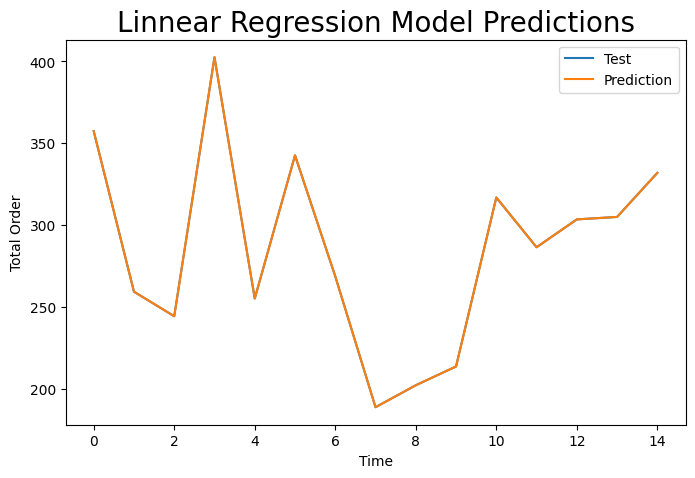

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(y_test, label= 'Test')
plt.plot(y_pred, label= 'Prediction')
plt.title('Linnear Regression Model Predictions', fontdict={'fontsize':20})
plt.xlabel('Time')
plt.ylabel('Total Order')
plt.legend()
plt.show()

## Classification model:

###Read the Data:

In [ ]:
# Nasa Dataset
classification_data = pd.read_csv("/content/nasa.csv")

print(classification_data.columns)
classification_data.head(3)

Index(['Name', 'Eccentricity', 'Inclination', 'Hazardous', 'Neo Reference ID',
       'Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Semi Major Axis', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')


,Name,Eccentricity,Inclination,Hazardous,Neo Reference ID,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,...,Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3723955,0.351674,28.412996,0,3723955,21.3,479.225620,1071.581063,12784,7.890000e+11,...,5.457,1.107776,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330
1,2446862,0.348248,4.237961,1,2446862,20.3,759.521423,1698.341531,12791,7.900000e+11,...,4.557,1.458824,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371
2,3671135,0.563441,17.927751,0,3671135,19.6,1048.431420,2344.363926,12798,7.900000e+11,...,4.724,1.323532,178.971951,556.160556,0.577800,198.145969,2.069265,2458009.403,354.237368,0.647295


In [ ]:
# Check for any missing values
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          462 non-null    int64  
 1   Eccentricity                  462 non-null    float64
 2   Inclination                   462 non-null    float64
 3   Hazardous                     462 non-null    int64  
 4   Neo Reference ID              462 non-null    int64  
 5   Absolute Magnitude            462 non-null    float64
 6   Est Dia in Feet(min)          462 non-null    float64
 7   Est Dia in Feet(max)          462 non-null    float64
 8   Close Approach Date           462 non-null    int64  
 9   Epoch Date Close Approach     462 non-null    float64
 10  Relative Velocity km per sec  462 non-null    float64
 11  Relative Velocity km per hr   462 non-null    float64
 12  Miles per hour                462 non-null    float64
 13  Miss 

<BarContainer object of 2 artists>

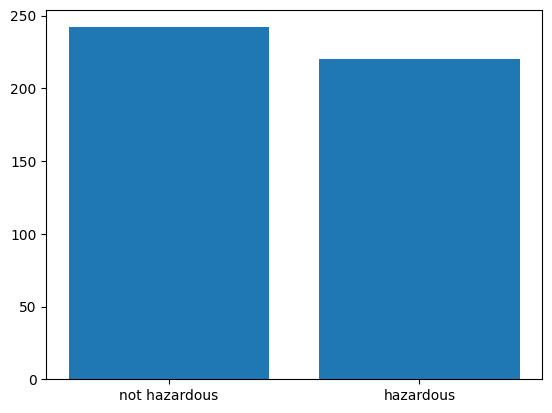

In [ ]:
# check the frequency of each class
height = classification_data["Hazardous"].value_counts()
plt.bar(x = ["not hazardous", "hazardous"], height= height)

###Randomly split the data into train and test subsets

In [ ]:
classification_data.columns

Index(['Name', 'Eccentricity', 'Inclination', 'Hazardous', 'Neo Reference ID',
       'Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Semi Major Axis', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = classification_data.drop(['Hazardous', 'Name', 'Neo Reference ID', 'Close Approach Date', 'Epoch Date Close Approach'], axis=1)
y = classification_data['Hazardous']

print(f"Shape of dataset: {classification_data.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_test: {X_test.shape}")

Shape of dataset: (462, 27)
Shape of X: (462, 22)
Shape of y: (462,)
Shape of partitions:
 X_train: (369, 22), 
 X_test: (93, 22)


if you would like to randomly split your data into train, validation, and test set, use the following code snippet:

In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_val: {X_val.shape},\n X_test: {X_test.shape}")

###Train logistic regression classifier:

Logit Equation:   $log odds = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Logistic Regression Equation:
## $ p = \frac{1}{1+ e^{-(β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k})}}$

In [ ]:
# create linear regression object
logistic_reg = linear_model.LogisticRegression()
# fit the linear regression model to your training data
logistic_reg.fit(X_train, y_train)
print(f"intercept:{logistic_reg.intercept_}\n")
print(f"Estiamted coefficients:{logistic_reg.coef_}")

intercept:[3.03952198e-12]

Estiamted coefficients:[[ 1.99235067e-08 -4.61667655e-07 -6.00247461e-07  1.00593629e-04
   2.24934191e-04  1.98093437e-09  7.13136304e-06  4.43115180e-06
   3.42251179e-09  1.33135709e-06 -6.67921929e-07 -1.79713239e-08
  -1.88517702e-08  9.30342490e-09  1.38529461e-06  6.74085337e-06
  -2.19254866e-08 -2.67814730e-06  4.05323364e-08 -4.74087210e-07
  -1.89109848e-06 -2.85154549e-09]]


## Performance Metrics:

See sklearn documentations [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

![](https://drive.google.com/uc?export=view&id=1MAzhijNiex7OpXI8ZEwNjJ6005jmnGwT) ![](https://drive.google.com/uc?export=view&id=1xtpS0KAt9j5gqRL4ZB1k3n5dHxJG7fVq)

In [ ]:
y_pred = logistic_reg.predict(X_test)
print(y_pred)
probalilities = logistic_reg.predict_proba(X_test)
print(f"Estiamted Probabilities:{probalilities}")

[0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1]
Estiamted Probabilities:[[0.63109889 0.36890111]
 [0.22582099 0.77417901]
 [0.71938985 0.28061015]
 [0.3310163  0.6689837 ]
 [0.26825438 0.73174562]
 [0.59913076 0.40086924]
 [0.5686175  0.4313825 ]
 [0.39395494 0.60604506]
 [0.47962114 0.52037886]
 [0.54390265 0.45609735]
 [0.63583597 0.36416403]
 [0.69133547 0.30866453]
 [0.58391793 0.41608207]
 [0.66197751 0.33802249]
 [0.07719238 0.92280762]
 [0.27365827 0.72634173]
 [0.37191309 0.62808691]
 [0.63805581 0.36194419]
 [0.48041855 0.51958145]
 [0.52329521 0.47670479]
 [0.58246161 0.41753839]
 [0.29158355 0.70841645]
 [0.65716595 0.34283405]
 [0.41838738 0.58161262]
 [0.49087328 0.50912672]
 [0.62743635 0.37256365]
 [0.40557733 0.59442267]
 [0.67589095 0.32410905]
 [0.52019809 0.47980191]
 [0.54602422 0.45397578]
 [0.6552532  0.3447468 ]
 [0.5508001

The `roc_auc_score` function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions.

In [ ]:
# using sklearn metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}\n")

auc = metrics.roc_auc_score(y_test, probalilities[:, 1]) # probability of the class with the greater label
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

Accuracy: 0.5483870967741935

Area Under ROC curve (AUC): 0.6172607879924954



array([[26, 15],
       [27, 25]])

Find TP, TN, FP, and FN to calculate Sensitivity, Specificity, and Precision:

In [ ]:
tn, fp, fn, tp = confusion_mat.ravel()
tn

26

Plot the ROC curve:

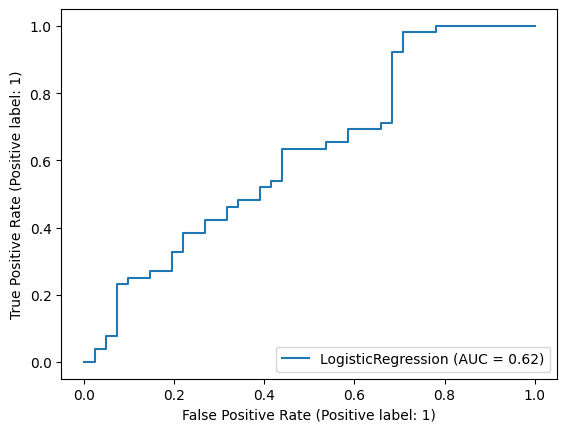

In [ ]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)

# Unsupervised Learning:

Find sklearn clustering methods [here](https://scikit-learn.org/stable/modules/clustering.html).

## K- Means Clustering

In [ ]:
cluster_data = pd.read_csv('Mall_Customers.csv')
cluster_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
cluster_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score'], dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score'>

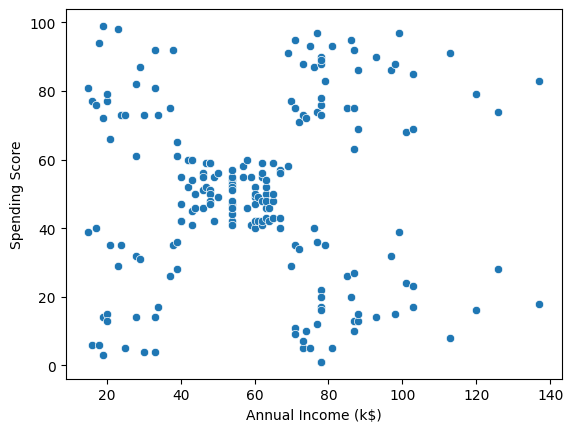

In [ ]:
import seaborn as sns
sns.scatterplot(data = cluster_data, x = 'Annual Income (k$)', y = 'Spending Score')

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

X = cluster_data.drop(["CustomerID", "Gender"], axis = 1)
X_norm = preprocessing.normalize(X)

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score'>

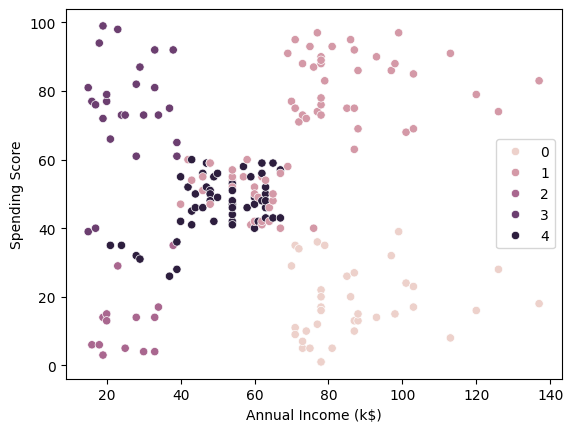

In [ ]:
sns.scatterplot(data = cluster_data, x = 'Annual Income (k$)', y = 'Spending Score', hue = kmeans.labels_)

<Axes: ylabel='Spending Score'>

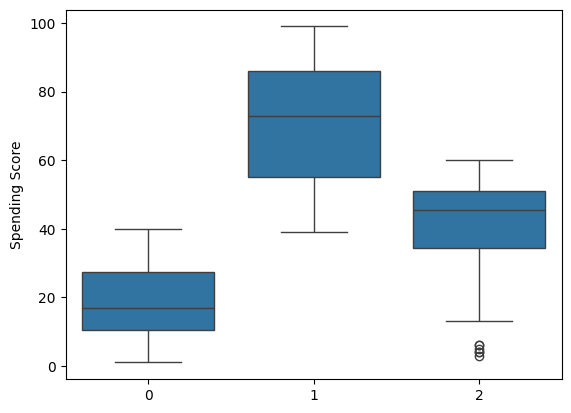

In [ ]:
sns.boxplot(x = kmeans.labels_, y = cluster_data['Spending Score'])

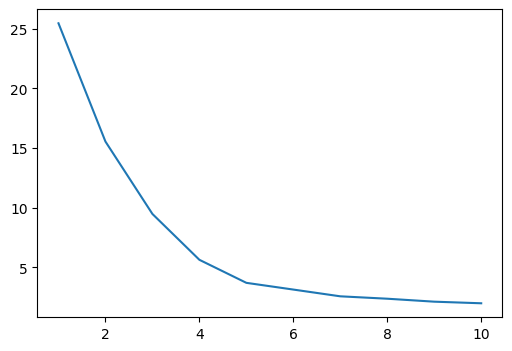

In [ ]:
values = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state = 0, n_init='auto')
  kmeans.fit(X_norm)
  values.append(kmeans.inertia_) # inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

plt.figure(figsize = (6,4))
plt.plot(range(1,11), values)